## 数据分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('data/train.csv')
cols = df.columns

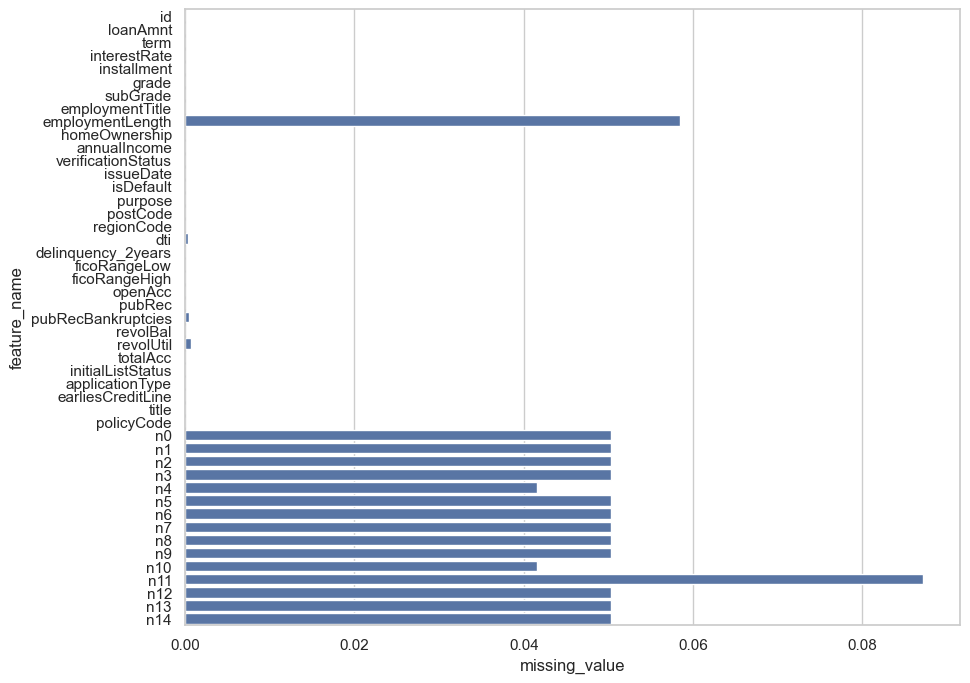

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(df.isna().mean(axis=0).reset_index().rename(columns={'index': 'feature_name', 0: 'missing_value'}), 
            y='feature_name', x='missing_value')
plt.show()

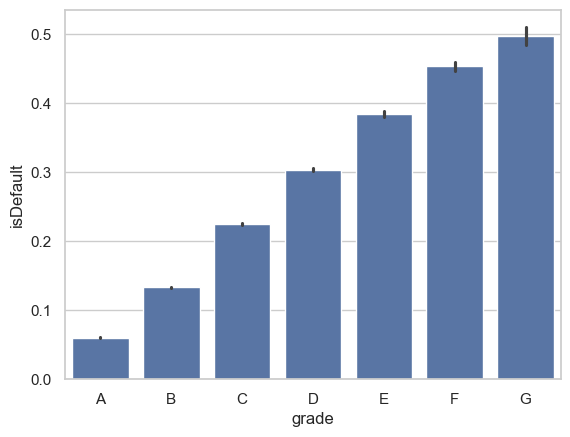

In [3]:
sns.barplot(df, x='grade', y='isDefault', order=list('ABCDEFG'))
plt.show()

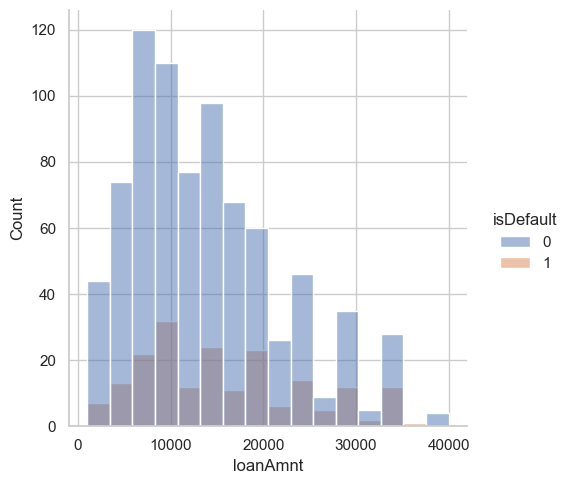

In [27]:
sns.displot(df, x='loanAmnt', hue='isDefault')

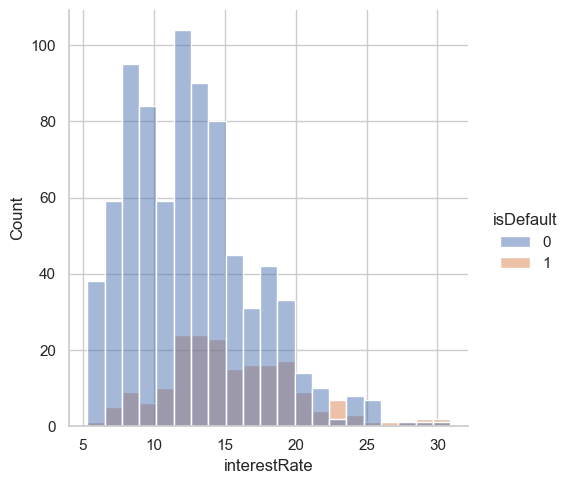

In [46]:
sns.displot(df, x='interestRate', hue='isDefault')

<Axes: xlabel='interestRate'>

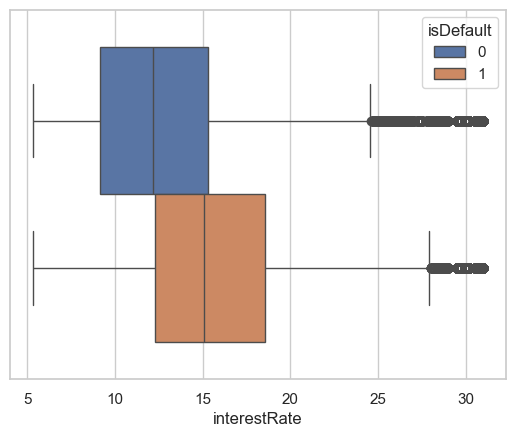

In [21]:
sns.boxplot(df,  x='interestRate', hue='isDefault')

<Axes: xlabel='loanAmnt'>

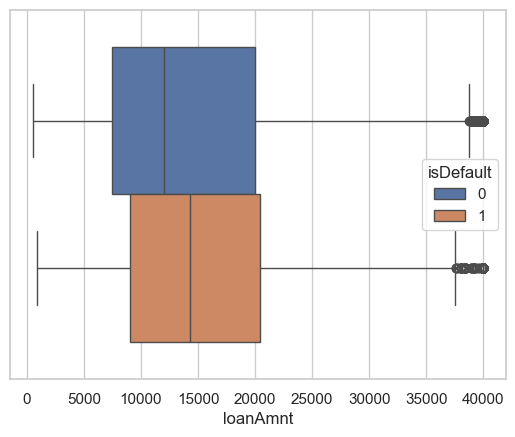

In [22]:
sns.boxplot(df, x='loanAmnt', hue='isDefault')

In [4]:
# sns.pairplot(df[['loanAmnt', 'interestRate', 'installment', 'isDefault']], hue='isDefault')

In [1]:
import os
import numpy as np
import pandas as pd

from src.process import Processor, TranTestSplit
from src.models import ModelHub
from src.metric import Metric

In [2]:
df = pd.read_csv('data/train.csv')
processor = Processor(df)
processor.sample(pos_frac=0.05, neg_frac=0.1)
feature, label = processor.data_preprocess_v1()
# feature, label = processor.imbalance_sample(feature, label)

start: read_data ...done
start: drop_column ...done
start: convert_time_col ...done
start: convert_employment_length ...done
start: convert_earlies_credit_line ...done
start: make_dummies ...done
start: get_label ...done


In [7]:
label.value_counts()

isDefault
0    64039
1     7980
Name: count, dtype: int64

In [3]:
n_split = 5
tts = TranTestSplit(feature, label)
train_x, train_y, test_x, test_y = tts.split()

train_x, train_y = processor.imbalance_sample(train_x, train_y)

--------------------------------------------------
              precision    recall  f1-score   support

           0      0.892     0.980     0.934      6371
           1      0.382     0.095     0.152       831

    accuracy                          0.878      7202
   macro avg      0.637     0.537     0.543      7202
weighted avg      0.834     0.878     0.844      7202



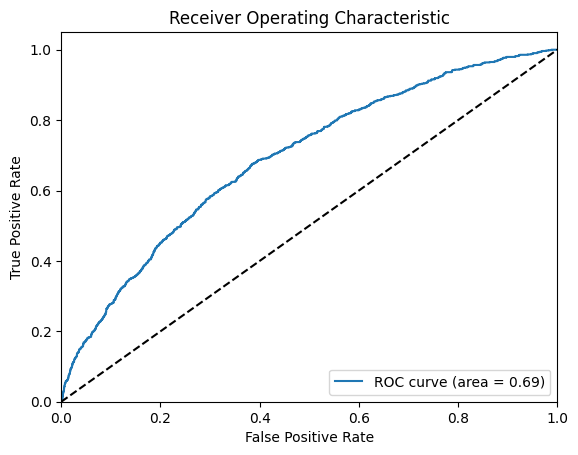

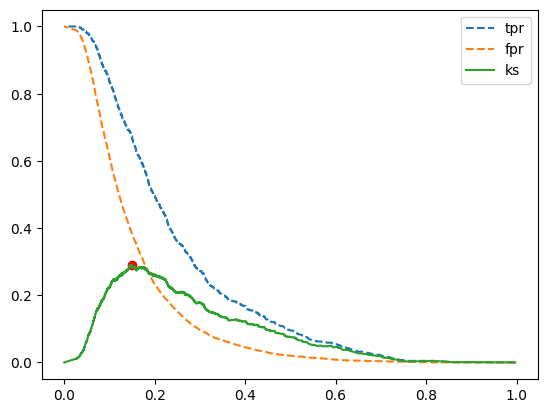

In [4]:
# model = ModelHub('logit', params={'solver': 'liblinear'})
# model = ModelHub('random_forest')
# model = ModelHub('xgboost')
# model = ModelHub('deep_forest', params={'verbose': 0})

model = ModelHub('logit', params={'solver': 'liblinear'})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
metric = Metric(test_y, proba[:, 1])
metric.summary()

--------------------------------------------------
              precision    recall  f1-score   support

           0      0.888     0.987     0.935      6371
           1      0.331     0.048     0.084       831

    accuracy                          0.879      7202
   macro avg      0.609     0.518     0.510      7202
weighted avg      0.824     0.879     0.837      7202



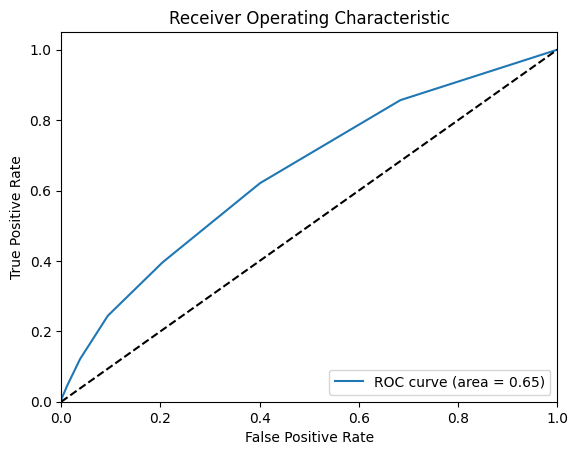

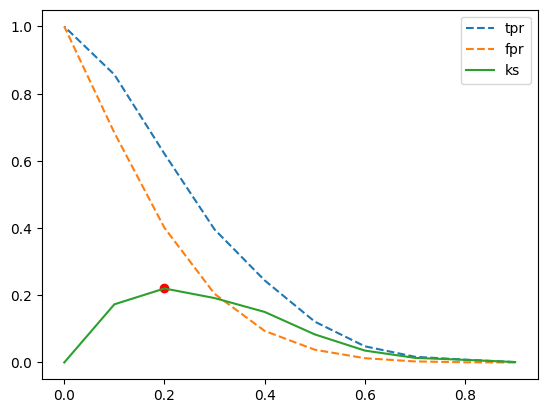

In [5]:
model = ModelHub('random_forest', params={'n_estimators': 10})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
metric = Metric(test_y, proba[:, 1])
metric.summary()

--------------------------------------------------
              precision    recall  f1-score   support

           0      0.888     0.990     0.937      6371
           1      0.380     0.046     0.082       831

    accuracy                          0.881      7202
   macro avg      0.634     0.518     0.509      7202
weighted avg      0.830     0.881     0.838      7202



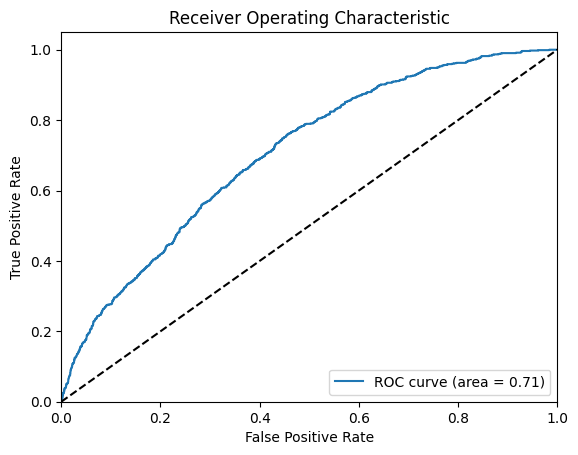

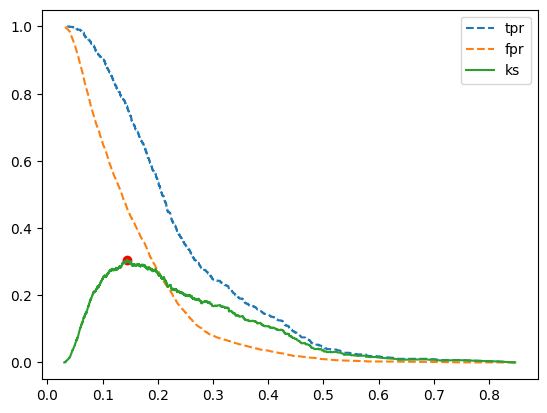

In [6]:
model = ModelHub('xgboost', params={'n_estimators': 10})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
metric = Metric(test_y, proba[:, 1])
metric.summary()

[2024-05-19 12:15:10.074] Start to fit the model:
[2024-05-19 12:15:10.074] Fitting cascade layer = 0 
[2024-05-19 12:16:20.202] layer = 0  | Val Acc = 93.669 % | Elapsed = 70.128 s
[2024-05-19 12:16:20.340] Fitting cascade layer = 1 
[2024-05-19 12:17:15.193] layer = 1  | Val Acc = 93.728 % | Elapsed = 54.853 s
[2024-05-19 12:17:15.291] Fitting cascade layer = 2 
[2024-05-19 12:18:13.293] layer = 2  | Val Acc = 93.725 % | Elapsed = 58.002 s
[2024-05-19 12:18:13.294] Early stopping counter: 1 out of 2
[2024-05-19 12:18:13.406] Fitting cascade layer = 3 
[2024-05-19 12:19:13.151] layer = 3  | Val Acc = 93.705 % | Elapsed = 59.744 s
[2024-05-19 12:19:13.151] Early stopping counter: 2 out of 2
[2024-05-19 12:19:13.151] Handling early stopping
[2024-05-19 12:19:13.171] The optimal number of layers: 2
[2024-05-19 12:19:13.205] Start to evalute the model:
[2024-05-19 12:19:13.220] Evaluating cascade layer = 0 
[2024-05-19 12:19:13.699] Evaluating cascade layer = 1 
--------------------------

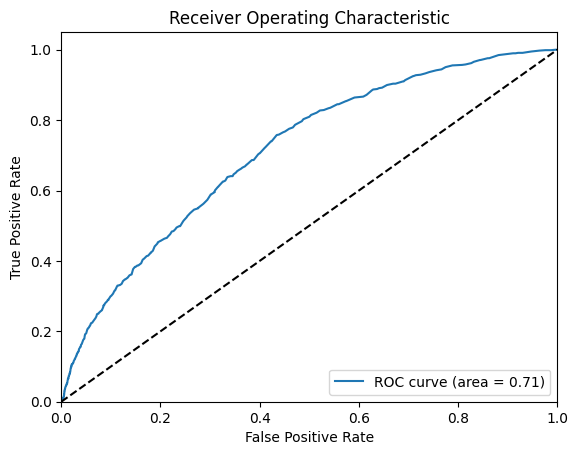

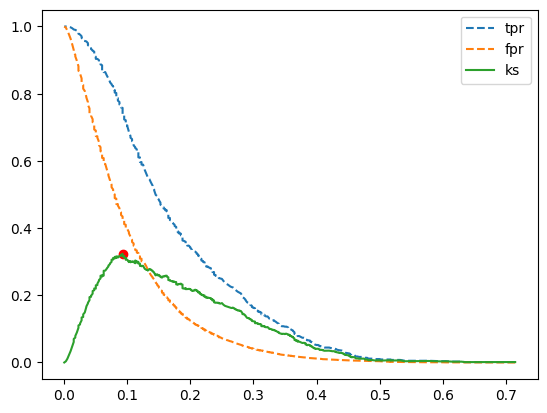

In [8]:
model = ModelHub('deep_forest')
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
metric = Metric(test_y, proba[:, 1])
metric.summary()